# Project 7: Statistical Analysis and Hypothesis Testing

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("F:/Neeyati/VIP_Internship/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

#Check for any missing values in the data using isnull() function
user_df.isnull().sum()


In [3]:
#check dulicates values using user define fuction.
def check_duplicate(l):
    mySet = set(l)
    if len(mySet) == len(l):
        print("List has no duplicate elements.")
    else:
        print("The list contains duplicate elements")
check_duplicate(user_df.userid)

List has no duplicate elements.


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

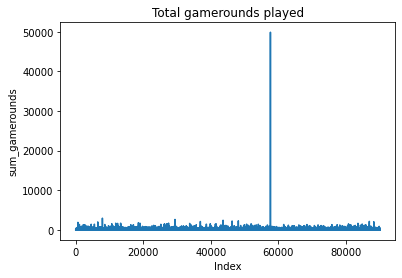

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [5]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
max_value = max(user_df.sum_gamerounds)
max_value
index = user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()

#To drop Outlier.
user_df.drop(user_df.index[index],inplace=True)


49854

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

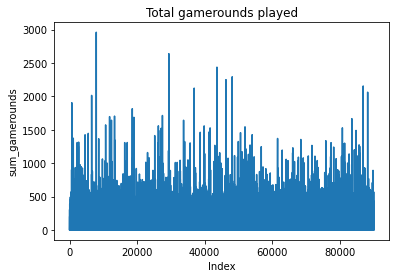

In [6]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)


## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [7]:
user_df.retention_7.sum()
#To check total count.
user_df.retention_7.count() 

16780

90188

In [8]:
#Insert calculation for 7-day retention rate

retention_rate_7=round((user_df.retention_7.sum()/user_df.shape[0])*100,2)
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [9]:
# Find number of customers with sum_gamerounds is equal to zero
user_df[user_df.sum_gamerounds == 0].shape[0]


3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

In [10]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
new_df = user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:201]
new_df

,sum_gamerounds,count
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
...,...,...
196,196,46
197,197,39
198,198,37
199,199,46


Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'Count of players Vs Sum_Gamerounds')

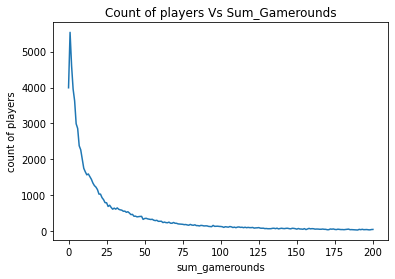

In [13]:
plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")
plt.title("Count of players Vs Sum_Gamerounds")
plt.plot(new_df["sum_gamerounds"],new_df["count"])

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [11]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories
#The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.
#By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

pd.crosstab(user_df.version, user_df.retention_7)
pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(),axis=1) # lambda is anonymous to defined funtion

retention_7,False,True
version,,
gate_30,36198,8501
gate_40,37210,8279


retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
From above crosstab we can conclude that only 19.02% players are active after 7 days in gate_30 type and 18.20% players are active in gate_40 type.

### Q3.2 Gamerounds summary for different game versions

In [12]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df[["version","sum_gamerounds"]].groupby("version").agg("mean")


,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game?
    
    From above table we canclude that, there is not much diffrence in both type of games most of the players on an average     played 51 gamerounds in both type.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [13]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
user_df["version"] = user_df["version"].replace(["gate_30","gate_40"],["A","B"])
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])


In [18]:
user_df[user_df.version == "A"].count()
user_df[user_df.version == "B"].count()

userid            44699
version           44699
sum_gamerounds    44699
retention_1       44699
retention_7       44699
dtype: int64

userid            45489
version           45489
sum_gamerounds    45489
retention_1       45489
retention_7       45489
dtype: int64

From count we are able to say that there is difference in sample size. Let's check this diiference is significant or not using statistical test.


### Q4.1 Shapiro test of Normality

In [14]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.48256540298461914, pvalue=0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
    
    As p- value is less than 0.05 we have sufficient evidience to reject H0, i.e, bothe samples distribution is not Normal.

### Q4.2 Test of homegienity of variance

In [15]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds,group_B.sum_gamerounds)


LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
 Results of Levene's test:
    As p-value is greater than 0.05, we are fails to reject H0 , i.e, Both game type have equal variance.

### Q4.3 Test of significance: Two sample test

In [16]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)


MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
 Results of Mann Whitney U Test:
    As p-value is less than 0.05 we have sufficient evidience to reject H0. Which implies bothe samples have different distribution.Here we are able to prove that ,staistical both samples differ from each other.
    

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [17]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
user_df[["version","retention_1","retention_7"]].groupby("version").agg("mean")
#user_df[["version","retension_1","retension_7"]].groupby("version").apply(lambda r: r/r.sum(),axis=1)



,retention_1,retention_7
version,,
A,0.448198,0.190183
B,0.442283,0.182000


<mark>__Analsysis Results:__
    
Final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    From above table we can reccommand to company CEO that keep gate at Level 30 as retension rate for Group A i,e Level  30 is more than Group B.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [18]:
df_A=user_df[user_df.version == "A"]
df_A
df_B=user_df[user_df.version == "B"]
df_B

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
6,1066,A,0,False,False
11,2101,A,0,False,False
13,2179,A,39,True,False
...,...,...,...,...,...
90179,9998576,A,14,True,False
90180,9998623,A,7,False,False
90182,9999178,A,21,True,False
90183,9999349,A,10,False,False


,userid,version,sum_gamerounds,retention_1,retention_7
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True
5,540,B,187,True,True
7,1444,B,2,False,False
...,...,...,...,...,...
90181,9998733,B,10,True,False
90184,9999441,B,97,True,False
90185,9999479,B,30,False,False
90187,9999768,B,51,True,False


In [19]:
import statistics
import random

In [20]:
#COnvert data column to numeric array.
sample_A=df_A['sum_gamerounds'].to_numpy()
sample_A

sample_B=df_A['sum_gamerounds'].to_numpy()
sample_B



array([ 3, 38,  0, ..., 21, 10, 28], dtype=int64)

array([ 3, 38,  0, ..., 21, 10, 28], dtype=int64)

In [21]:
#User defined function for Bootstrap sampling.
random.seed(2345)
def myboot(mysample):
    resample = random.choices(mysample, k = len(mysample))
    m = statistics.mean(resample)
    return m

In [22]:
mymean_A = []
for i in range(1000):
    x = myboot(sample_A)
    mymean_A.append(x)
mymean_B = []
for i in range(1000):
    x = myboot(sample_B)
    mymean_B.append(x)

(array([  3.,   0.,   0., 245.,   0.,   0., 680.,   0.,   0.,  72.]),
 array([49. , 49.3, 49.6, 49.9, 50.2, 50.5, 50.8, 51.1, 51.4, 51.7, 52. ]),
 <BarContainer object of 10 artists>)

(array([  3.,   0., 230.,   0.,   0., 662.,   0., 104.,   0.,   1.]),
 array([49. , 49.4, 49.8, 50.2, 50.6, 51. , 51.4, 51.8, 52.2, 52.6, 53. ]),
 <BarContainer object of 10 artists>)

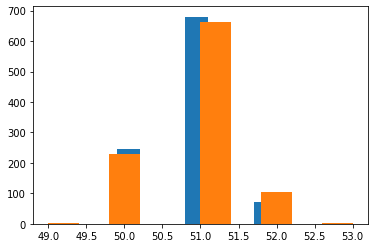

In [23]:
plt.hist(mymean_A)
plt.hist(mymean_B)

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

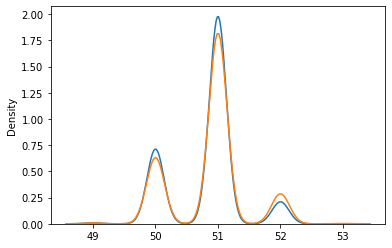

In [24]:
sns.distplot(mymean_A, hist=False)
sns.distplot(mymean_B, hist=False)